### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

<br>

### Import Data and Create Binary Target

In [3]:
fires = pd.read_csv('Fires_At_Least_10_Acres_2000_Later.csv')

In [22]:
fires['FIRE_SIZE_CLASS_BIN'] = np.where(fires['FIRE_SIZE']> 28, 1, 0)
fires['FIRE_SIZE_CLASS_BIN'].value_counts()

0    103658
1     86179
Name: FIRE_SIZE_CLASS_BIN, dtype: int64

<br>

### Train Test Split and Dummy Variable Creation

In [23]:
from sklearn.model_selection import train_test_split

fires_train, fires_test = train_test_split(fires, test_size=0.2, random_state=42)

In [24]:
combined_df = pd.get_dummies(fires_train, columns = ['STAT_CAUSE_DESCR', 'REGION'])
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151869 entries, 128856 to 121958
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          151869 non-null  int64  
 1   OBJECTID                            151869 non-null  int64  
 2   SOURCE_SYSTEM_TYPE                  151869 non-null  object 
 3   SOURCE_SYSTEM                       151869 non-null  object 
 4   NWCG_REPORTING_AGENCY               151869 non-null  object 
 5   NWCG_REPORTING_UNIT_ID              151869 non-null  object 
 6   NWCG_REPORTING_UNIT_NAME            151869 non-null  object 
 7   SOURCE_REPORTING_UNIT               151869 non-null  object 
 8   SOURCE_REPORTING_UNIT_NAME          151869 non-null  object 
 9   FIRE_NAME                           80446 non-null   object 
 10  FIRE_YEAR                           151869 non-null  int64  
 11  DISCOVERY_DATE       

In [25]:
combined_df_test = pd.get_dummies(fires_test, columns = ['STAT_CAUSE_DESCR', 'REGION'])
combined_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37968 entries, 75492 to 137547
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          37968 non-null  int64  
 1   OBJECTID                            37968 non-null  int64  
 2   SOURCE_SYSTEM_TYPE                  37968 non-null  object 
 3   SOURCE_SYSTEM                       37968 non-null  object 
 4   NWCG_REPORTING_AGENCY               37968 non-null  object 
 5   NWCG_REPORTING_UNIT_ID              37968 non-null  object 
 6   NWCG_REPORTING_UNIT_NAME            37968 non-null  object 
 7   SOURCE_REPORTING_UNIT               37968 non-null  object 
 8   SOURCE_REPORTING_UNIT_NAME          37968 non-null  object 
 9   FIRE_NAME                           19995 non-null  object 
 10  FIRE_YEAR                           37968 non-null  int64  
 11  DISCOVERY_DATE                      

<br>

### Logistic Regression

##### First Model - Fire Cause Only

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(combined_df[['STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure']])
y_train = combined_df['FIRE_SIZE_CLASS_BIN']

In [27]:
lm_1 = LogisticRegressionCV()
lm_1.fit(X_train, y_train)
lm_1.score(X_train, y_train)

0.5864264596461424

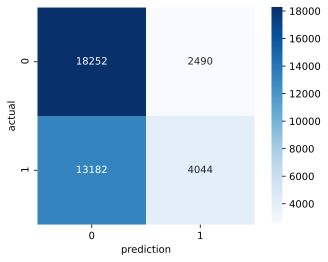

In [28]:
X_test = scaler.transform(combined_df_test[['STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure']])


preds = lm_1.predict(X_test)

conf_matrix = confusion_matrix(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)
sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual');

In [29]:
f1_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.3404040404040404

In [30]:
recall_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.23476140717520028

In [31]:
precision_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.6189164370982553

##### Second Model - Region Only 

In [32]:
X_train = scaler.fit_transform(combined_df[['REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West']])
y_train = combined_df['FIRE_SIZE_CLASS_BIN']

In [33]:
lm_2 = LogisticRegressionCV()
lm_2.fit(X_train, y_train)
lm_2.score(X_train, y_train)

0.6031184771085607

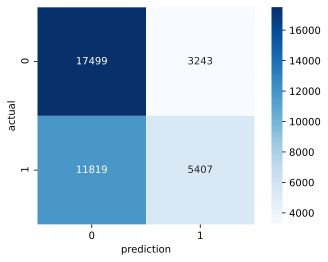

In [34]:
X_test = scaler.transform(combined_df_test[[ 'REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West']])


preds = lm_2.predict(X_test)

conf_matrix = confusion_matrix(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)
sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual');

In [35]:
f1_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.4179162157984233

In [36]:
recall_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.31388598629977943

In [37]:
precision_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.6250867052023121

##### Third Model - Latitude and Longitude Only

In [38]:
X_train = scaler.fit_transform(combined_df[['LATITUDE', 'LONGITUDE']])

y_train = combined_df['FIRE_SIZE_CLASS_BIN']

In [39]:
lm_3 = LogisticRegressionCV()
lm_3.fit(X_train, y_train)
lm_3.score(X_train, y_train)

0.6054691872600728

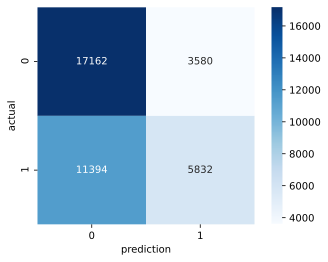

In [40]:
X_test = scaler.transform(combined_df_test[['LATITUDE', 'LONGITUDE']])


preds = lm_3.predict(X_test)

conf_matrix = confusion_matrix(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)
sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual');

In [41]:
f1_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.4378707110143404

In [42]:
recall_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.3385579937304075

In [43]:
precision_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.6196345091372716

##### Fourth Model - Discovery Day of Year Only

In [44]:
X_train = scaler.fit_transform(combined_df[['DISCOVERY_DOY']])

y_train = combined_df['FIRE_SIZE_CLASS_BIN']

In [45]:
lm_4 = LogisticRegressionCV()
lm_4.fit(X_train, y_train)
lm_4.score(X_train, y_train)

0.5397875800854683

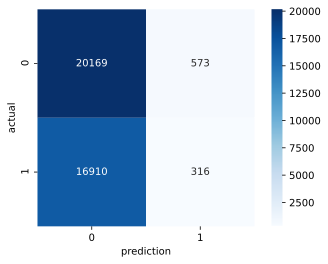

In [46]:
X_test = scaler.transform(combined_df_test[['DISCOVERY_DOY']])


preds = lm_4.predict(X_test)

conf_matrix = confusion_matrix(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)
sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual');

In [47]:
f1_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.03488821418713773

In [48]:
recall_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.018344363171949377

In [49]:
precision_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.35545556805399325

##### Fifth Model - Region and Fire Cause

In [50]:
X_train = scaler.fit_transform(combined_df[['STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure', 'REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West']])

y_train = combined_df['FIRE_SIZE_CLASS_BIN']

In [51]:
lm_5 = LogisticRegressionCV()
lm_5.fit(X_train, y_train)
lm_5.score(X_train, y_train)

0.6042115244059024

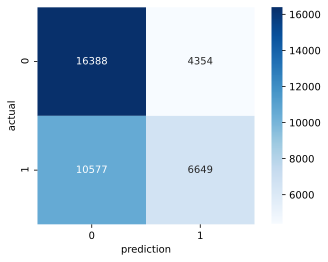

In [52]:
X_test = scaler.transform(combined_df_test[['STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure', 'REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West']])


preds = lm_5.predict(X_test)

conf_matrix = confusion_matrix(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)
sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual');

In [54]:
f1_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.47107584399022284

In [55]:
recall_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.38598629977940324

In [56]:
precision_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.6042897391620468

##### Sixth Model - Region, Fire Cause, and Discovery Day of Year

In [57]:
X_train = scaler.fit_transform(combined_df[['STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure', 'REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West', 'DISCOVERY_DOY']])

y_train = combined_df['FIRE_SIZE_CLASS_BIN']

In [58]:
lm_6 = LogisticRegressionCV()
lm_6.fit(X_train, y_train)
lm_6.score(X_train, y_train)

0.6028485075953618

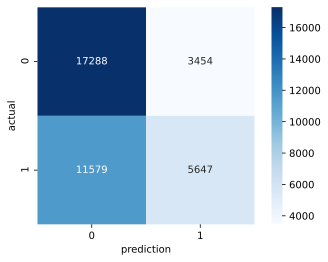

In [59]:
X_test = scaler.transform(combined_df_test[['STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure', 'REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West', 'DISCOVERY_DOY']])


preds = lm_6.predict(X_test)

conf_matrix = confusion_matrix(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)
sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual');

In [60]:
f1_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.4289892505792533

In [61]:
recall_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.3278184140253106

In [62]:
precision_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

0.6204812657949675

<br>

### KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

X_train = combined_df[['REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West', 'STAT_CAUSE_DESCR_Campfire', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure', 'DISCOVERY_DATE',
                      'LATITUDE', 'LONGITUDE']]

y_train = combined_df['FIRE_SIZE_CLASS_BIN']


knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='recall')
print(scores)

[0.53183466 0.53270486 0.53328499 0.54561276 0.5453227  0.54677302
 0.54176334 0.53451276 0.53741299 0.54213198]


In [64]:
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='recall')
print(scores)

[0.44031907 0.44234953 0.45322698 0.4422045  0.44858593 0.44858593
 0.45229118 0.44083527 0.44025522 0.44205946]


<br>

### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

In [66]:
X_train = combined_df[['REGION_Alaska', 'REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West', 'STAT_CAUSE_DESCR_Campfire', 
                     'STAT_CAUSE_DESCR_Arson', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
                      'LATITUDE', 'LONGITUDE']]

y_train = combined_df['FIRE_SIZE_CLASS_BIN']


In [ ]:
randomforest = RandomForestClassifier(n_estimators=1000)
quick_test_afew_times(randomforest, X_train, y_train)

In [ ]:
X_test = (combined_df_test[['REGION_Alaska', 'REGION_Other', 
                    'REGION_Northeast', 'REGION_Northern Rockies',
                     'REGION_Northwest', 'REGION_Ohio Valley',
                     'REGION_South', 'REGION_Southeast', 
                     'REGION_Southwest', 'REGION_Upper Midwest',             
                     'REGION_West', 'STAT_CAUSE_DESCR_Campfire',
                     'STAT_CAUSE_DESCR_Arson', 
                    'STAT_CAUSE_DESCR_Children', 'STAT_CAUSE_DESCR_Debris Burning',
                     'STAT_CAUSE_DESCR_Equipment Use', 'STAT_CAUSE_DESCR_Fireworks',
                     'STAT_CAUSE_DESCR_Lightning', 'STAT_CAUSE_DESCR_Miscellaneous', 
                     'STAT_CAUSE_DESCR_Missing/Undefined', 'STAT_CAUSE_DESCR_Powerline',             
                     'STAT_CAUSE_DESCR_Railroad', 'STAT_CAUSE_DESCR_Smoking',
                      'STAT_CAUSE_DESCR_Structure', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
                      'LATITUDE', 'LONGITUDE']])


preds = randomforest.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)
sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual');

In [ ]:
f1_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

In [ ]:
recall_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

In [ ]:
precision_score(combined_df_test['FIRE_SIZE_CLASS_BIN'], preds)

<br>

### XGBoost

In [109]:
import xgboost as xgb